<a href="https://colab.research.google.com/github/mjkanf1994/ml_edu/blob/master/20200819_house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 구글 드라이브 + 코랩연동
-구글드라이브와 코랩 연동 작업

In [19]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
%cd drive/'My Drive'/'Colab Notebooks/ml_project2'

[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks/ml_project2'
/content/drive/My Drive/Colab Notebooks/ml_project2


In [21]:
%pwd

'/content/drive/My Drive/Colab Notebooks/ml_project2'

In [22]:
%ls

sample_submission.csv  test.csv  train.csv


In [23]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from IPython.core.display import display, HTML
from pandas_profiling import ProfileReport

In [33]:
%matplotlib inline
import matplotlib.pylab as plt

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

### (1) 데이터 수집


In [24]:
import pandas as pd
from pandas.io import gbq

# import sample_submission file
sample_submission = pd.read_csv('sample_submission.csv')

 # myproject20200819:house20200819

# Connect to Google Cloud API and Upload DataFrame
sample_submission.to_gbq(destination_table='house20200819.sample_submission', 
                  project_id='myproject20200819', 
                  if_exists='replace')


1it [00:04,  4.99s/it]


In [25]:
import pandas as pd
from pandas.io import gbq

# import sample_submission file
test=pd.read_csv('test.csv')
colnames_dict = {"1stFlrSF": "my1stFlrSF", "2ndFlrSF": "my2ndFlrSF", "3SsnPorch": "my3SsnPorch"} 

test = test.rename(columns=colnames_dict)
###변수명이 숫자인것은 변경해주기

 # myproject20200819:house20200819

# Connect to Google Cloud API and Upload DataFrame
test.to_gbq(destination_table='house20200819.test', 
                  project_id='myproject20200819', 
                  if_exists='replace')

1it [00:06,  6.48s/it]


In [26]:
import pandas as pd
from pandas.io import gbq

# import sample_submission file
train= pd.read_csv('train.csv')

colnames_dict = {"1stFlrSF": "my1stFlrSF", "2ndFlrSF": "my2ndFlrSF", "3SsnPorch": "my3SsnPorch"} 

train = train.rename(columns=colnames_dict)


 # myproject20200819:house20200819

# Connect to Google Cloud API and Upload DataFrame
train.to_gbq(destination_table='house20200819.train', 
                  project_id='myproject20200819', 
                  if_exists='replace')


1it [00:06,  6.76s/it]


###(2) 데이터확인


In [27]:
display(train)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,my1stFlrSF,my2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,my3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,

In [28]:
###numerical변수와 Categorical 변수 구분
#numerical변수
numeric_features = train.select_dtypes(include=[np.number])
print(numeric_features.columns)
print("The total number of numeric features are: ", len(numeric_features.columns))

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'my1stFlrSF', 'my2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'my3SsnPorch', 'ScreenPorch',
       'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
The total number of numeric features are:  38


In [29]:
#categorical변수
categorical_features = train.select_dtypes(exclude=[np.number])
print(categorical_features.columns)
print("The total number of numeric features are: ", len(categorical_features.columns))

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
The total number of numeric features are:  43


### 연도 데이터 탐색 개요
- categorical은 논의 제외
- ID 삭제(머신러닝에서 아이디는 빼기. 패턴을 발견할 수 없는 숫자들.)
-종속 변수인 salesprice삭제

In [30]:
###year관련 feature
year_fea = [fea for fea in numeric_features if 'Yr' in fea or 'Year' in fea]
print(year_fea)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


##(1) 연도의 변수 처리 방법

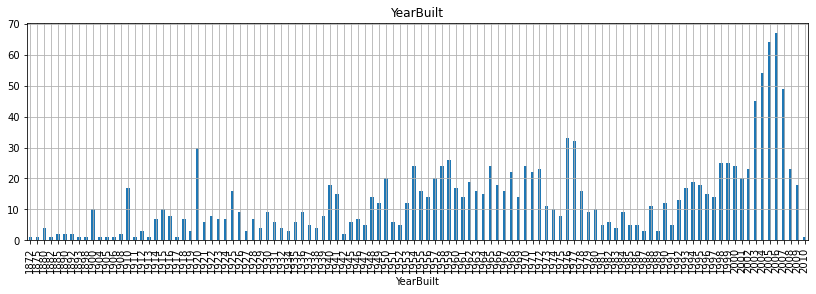

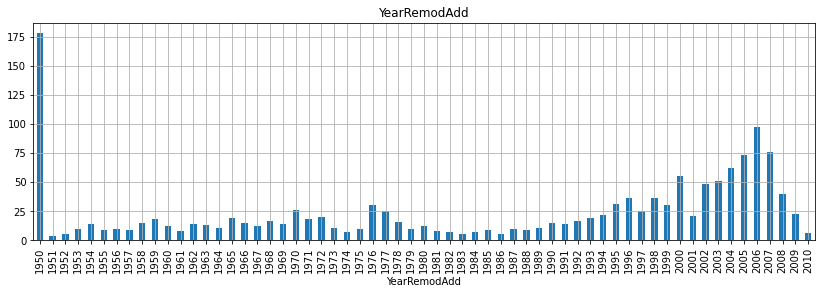

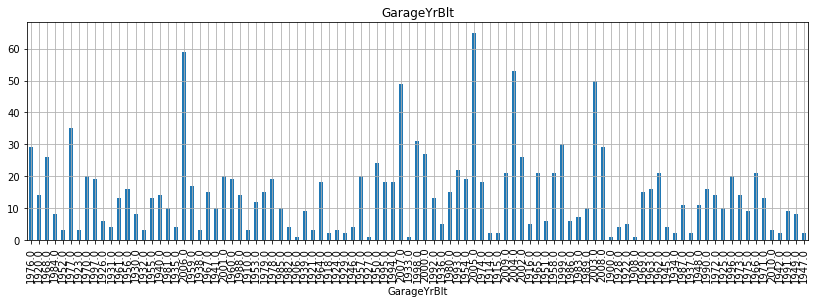

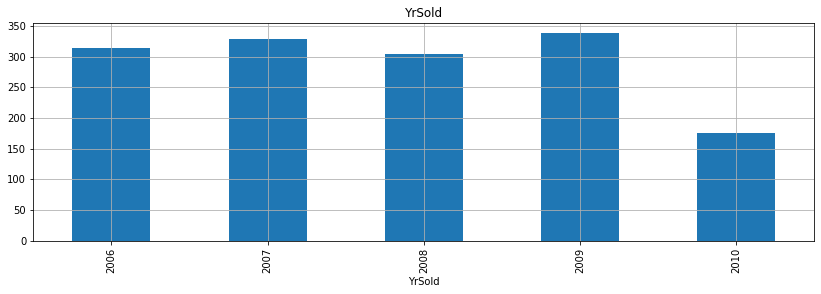

In [34]:
for fea in year_fea:
  data = train.copy()
  data[fea].value_counts(sort=False).plot(kind='bar')
  plt.xlabel(fea)
  plt.title(fea)
  plt.show()

##(2) sales price와의 관계

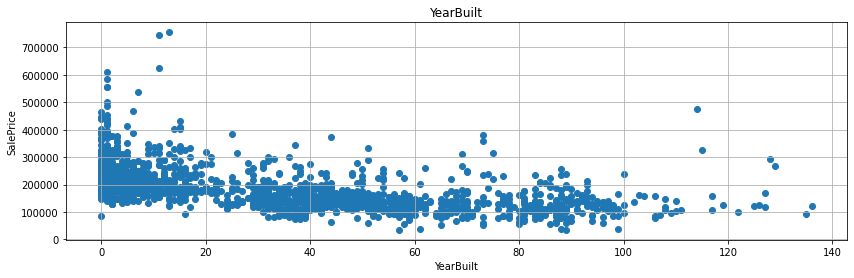

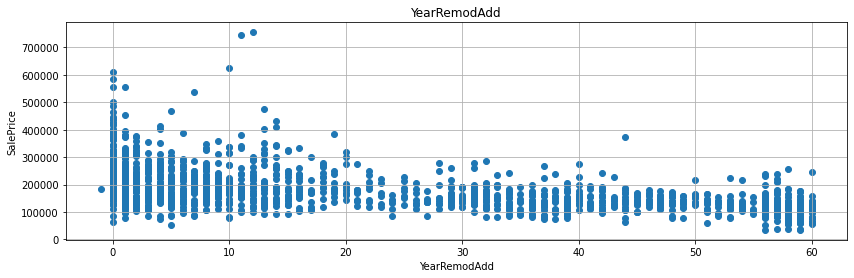

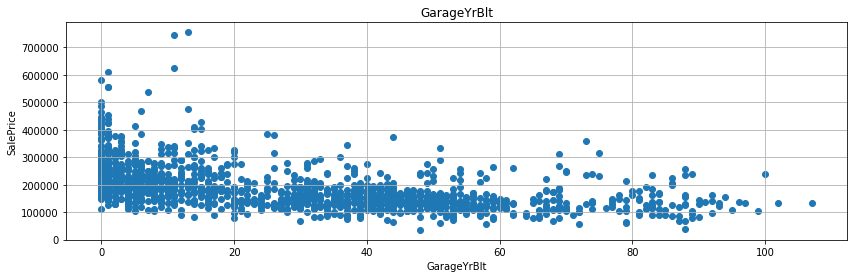

In [35]:
for fea in year_fea:
    if fea!='YrSold': # `YrSold` 변수는 제외 한다.
        data=train.copy() # 이렇게 해주는 것이 좋다. (원본 데이터는 늘 보존할 수 있다)
        data[fea]=data['YrSold']-data[fea] #  여기가 사실 핵심 포인트다. 연수 차이 계산
        plt.scatter(data[fea], data['SalePrice']) # 산점도 그래프를 그린다.
        plt.title(fea)
        plt.xlabel(fea)
        plt.ylabel('SalePrice')
        plt.show()

### 양적변수 시각화
- 이산형(Discrete) 변수: 인원수, 개수 등
- 연속형(Continuous) 변수: 온도, 키, 몸무게, 소득 등

### 1. 이산형 그래프

## (1) 가상의 데이터 생성

In [36]:
# discrete dataframe(이산형)
temp = pd.DataFrame({'id' : [1,2,3,4,5,6,7,8,9,10],
                    'number_of_room' : [2,4,3,2,4,3,3,3,4,2],
                    'SalePrice' : [1000,1300,2000,1030,2030,2050,2000,5000,3000,3500]
                    })
print(temp)

   id  number_of_room  SalePrice
0   1               2       1000
1   2               4       1300
2   3               3       2000
3   4               2       1030
4   5               4       2030
5   6               3       2050
6   7               3       2000
7   8               3       5000
8   9               4       3000
9  10               2       3500


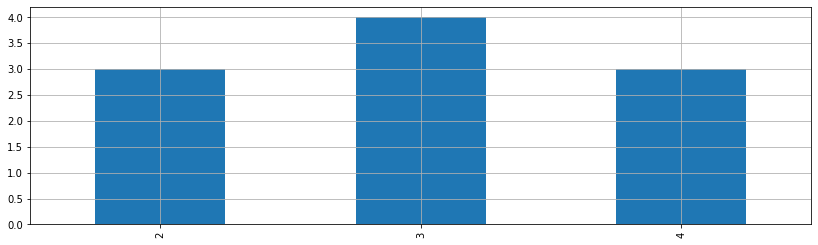

In [38]:
#matplotlib 형태로 작성
temp['number_of_room'].value_counts(sort=False).plot.bar()
plt.show()

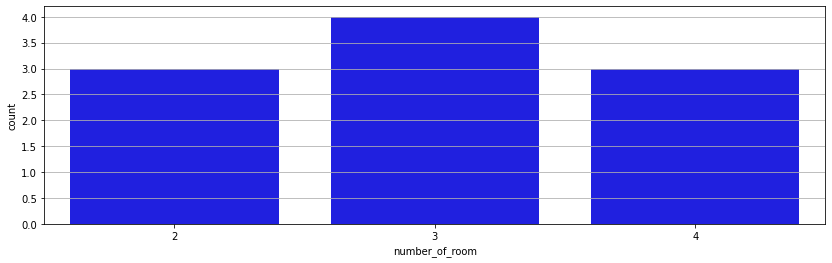

In [39]:
#seaborn 방식 그래프 작성
sns.countplot(
    data= temp,
    x= "number_of_room", 
    color='blue'
)
plt.show()

## (2) 이산형 변수와 saleprice 

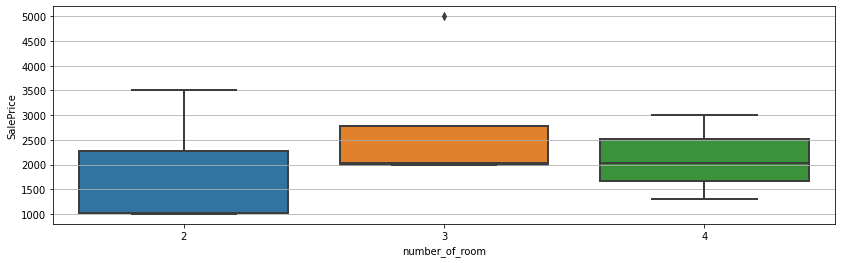

In [40]:
###saleprice와 number_of_room의 관계를 boxplot으로 작성
sns.boxplot(x = "number_of_room", y = "SalePrice", data = temp)
plt.show()

## (3) 실무데이터 적용

In [41]:
#numeric_features에서 연속형 데이터와 이산형 데이터를 구분
#unique()함수를 사용. 즉 유일한 값을 뽑는데, 그 개수가 50개 이상이면 연속형
#그 이하면 discrete으로 판단
#year_fea와 id는 같이 제거한다.
discrete_vars=[fea for fea in numeric_features if len(train[fea].unique()) < 50 and fea not in year_fea + ['Id']]
print("Discrete Variables Count: {}".format(len(discrete_vars)))

Discrete Variables Count: 17


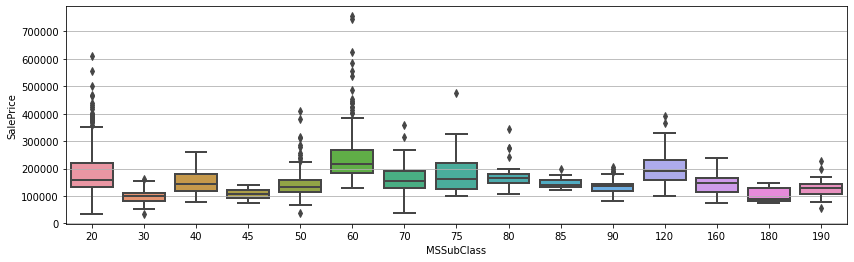

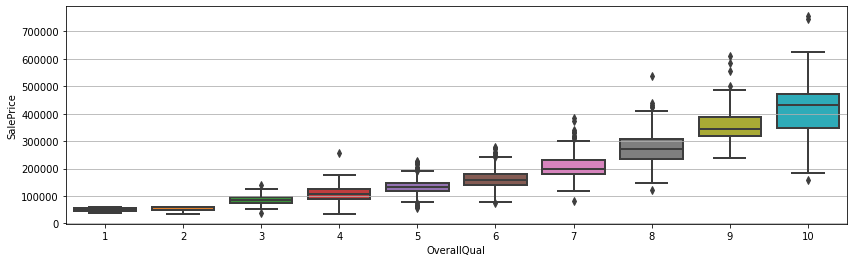

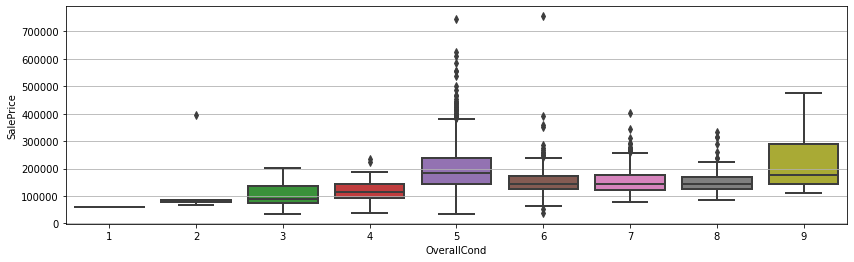

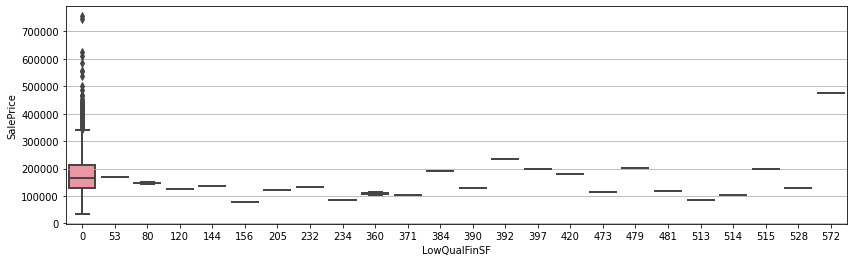

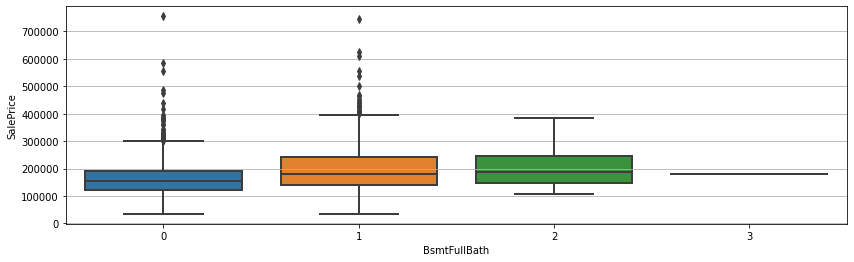

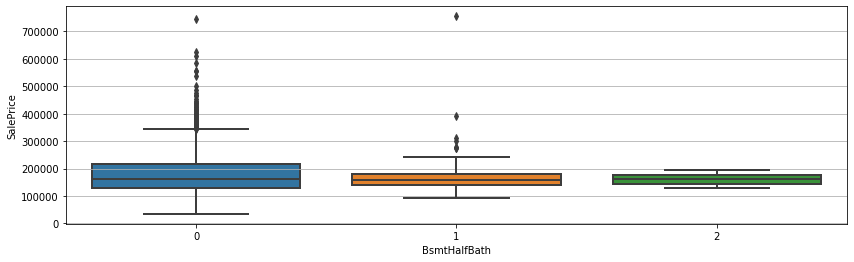

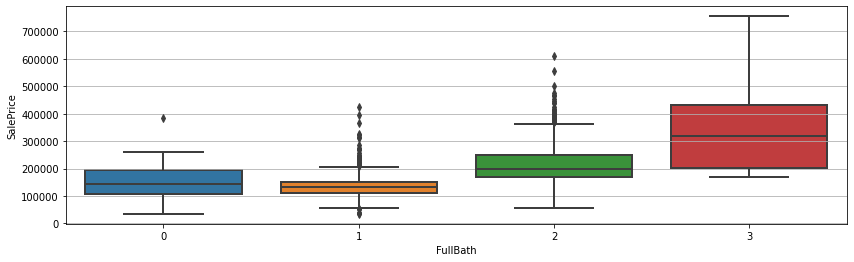

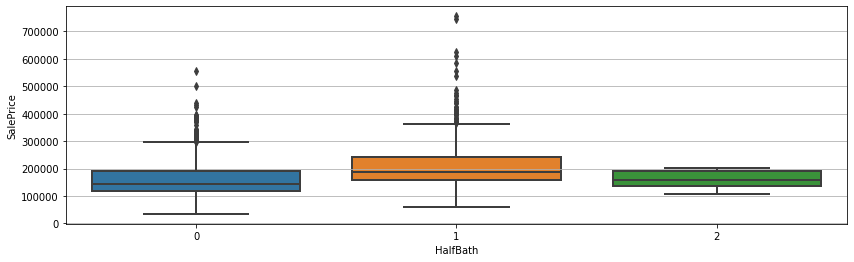

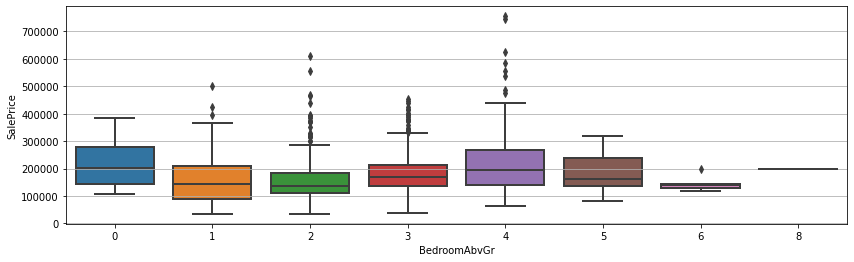

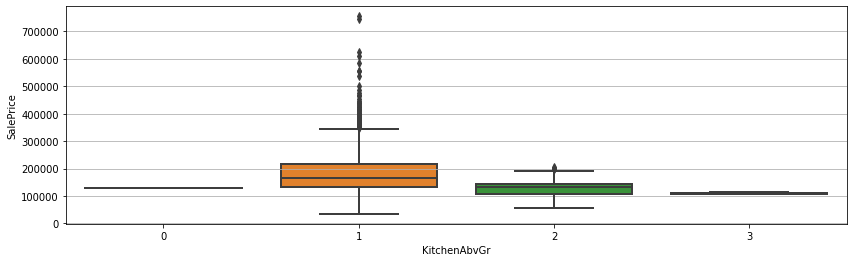

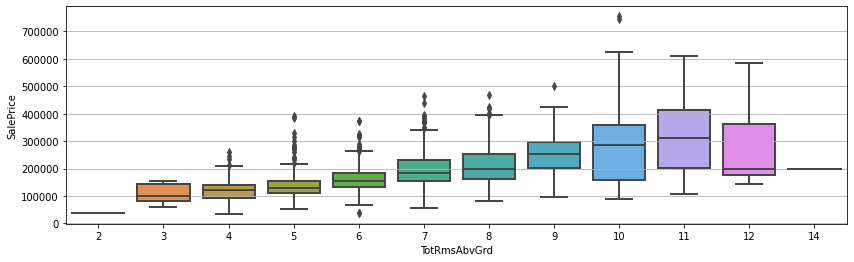

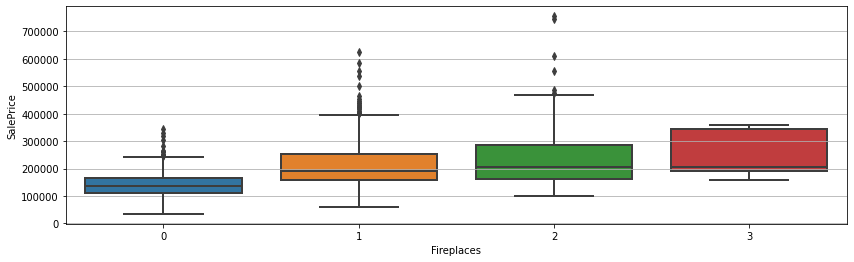

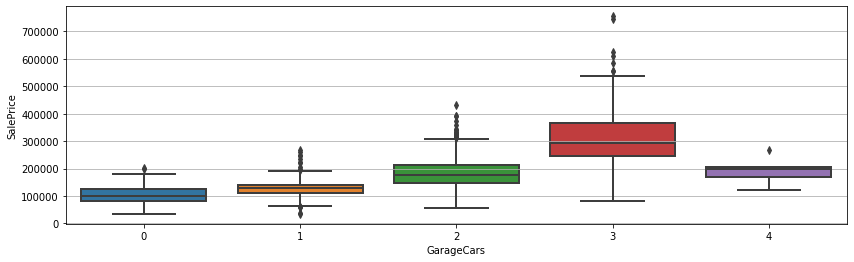

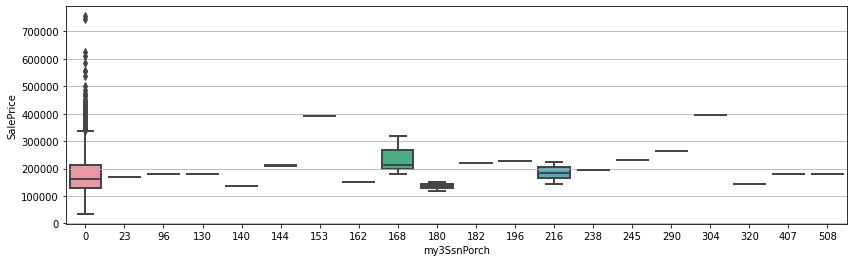

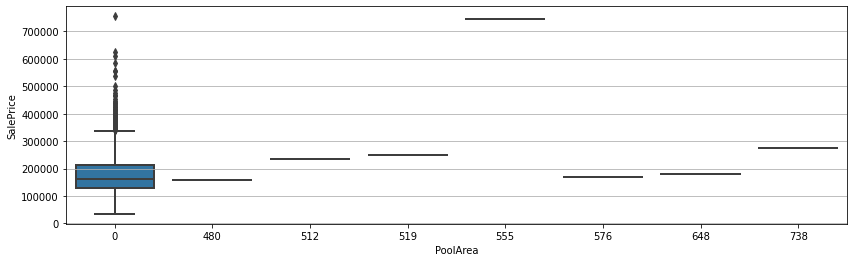

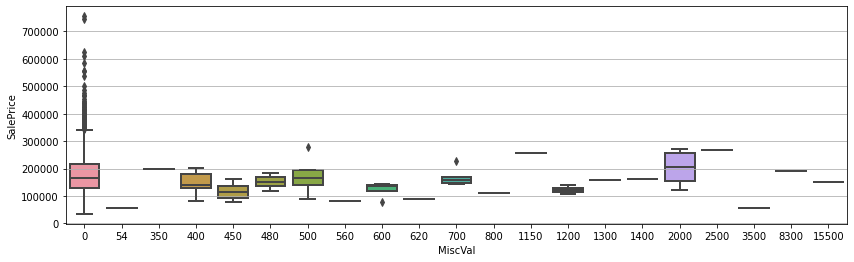

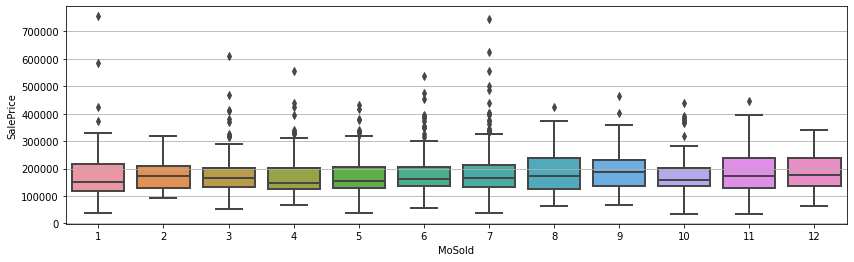

In [42]:
#시각화진행
for fea in discrete_vars:
  data = train.copy()
  sns.boxplot(x = fea, y='SalePrice', data = data)
  plt.show()

Discrete Variables Count: 14


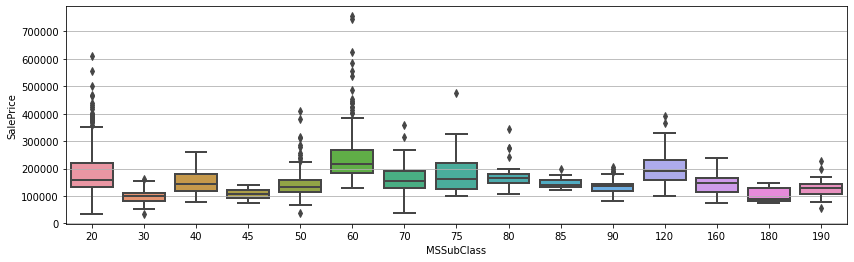

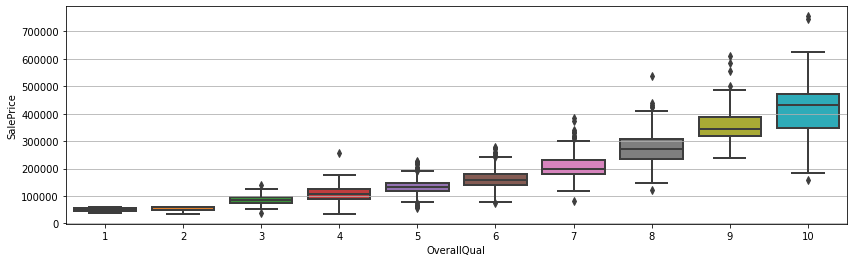

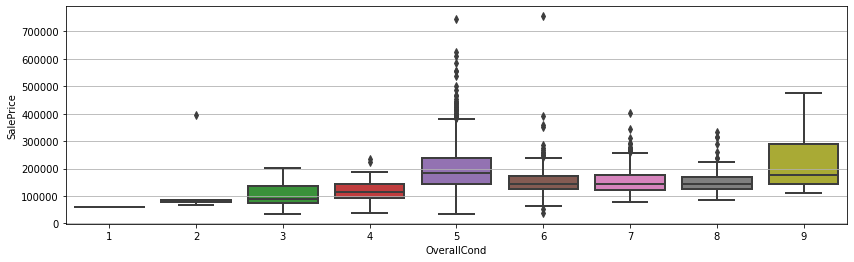

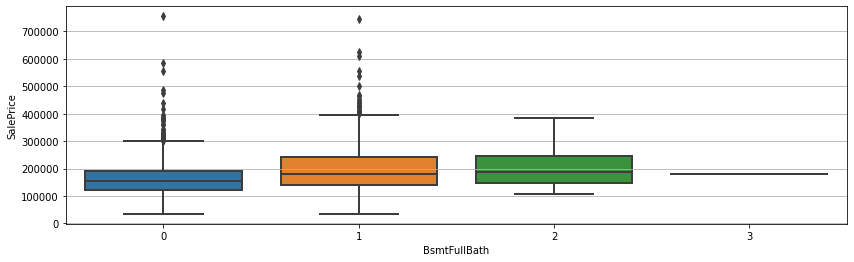

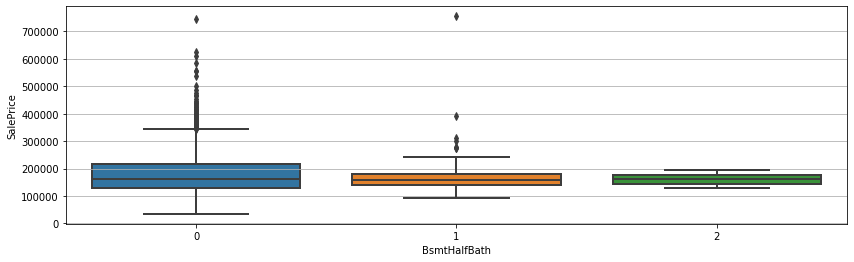

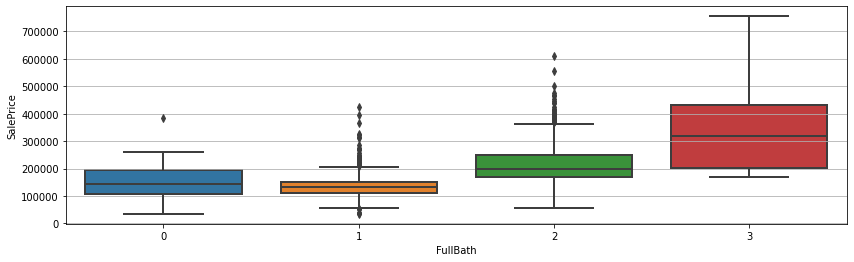

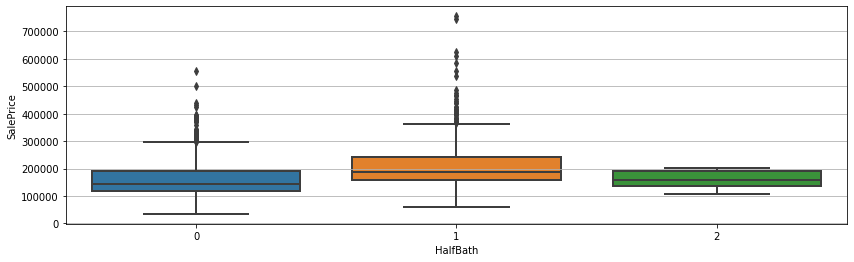

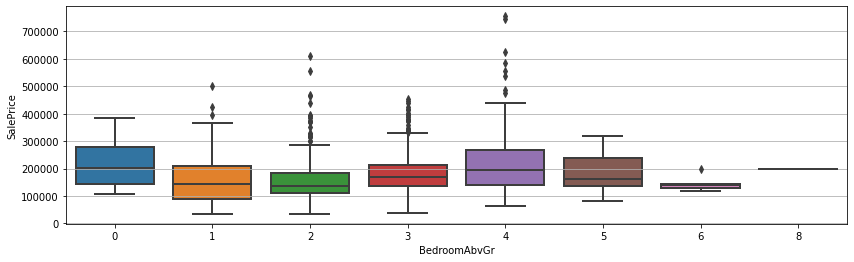

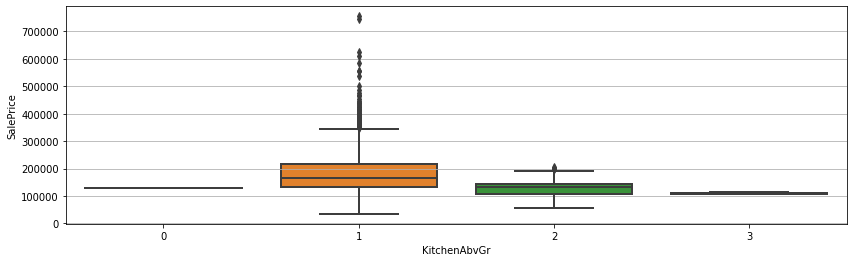

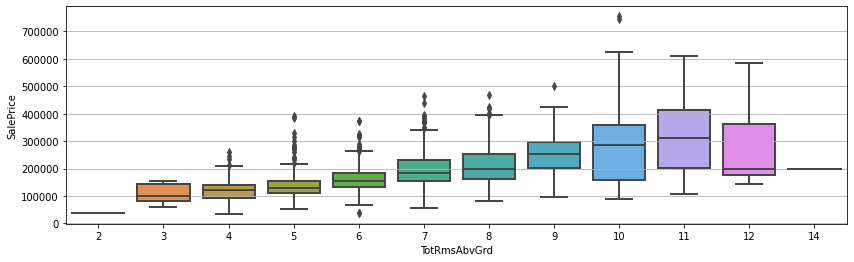

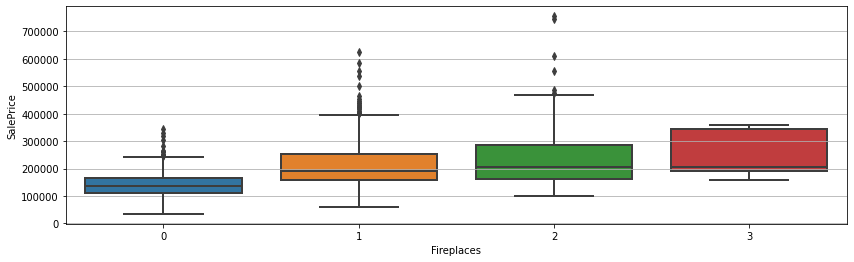

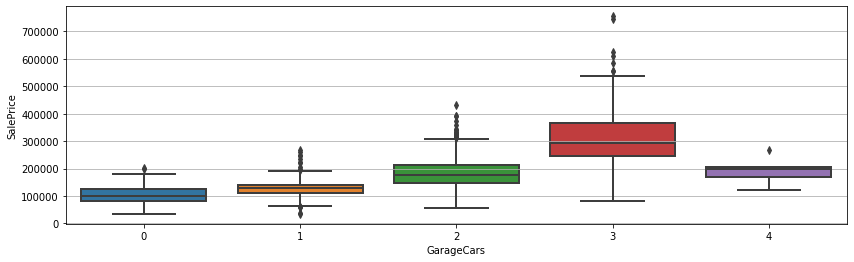

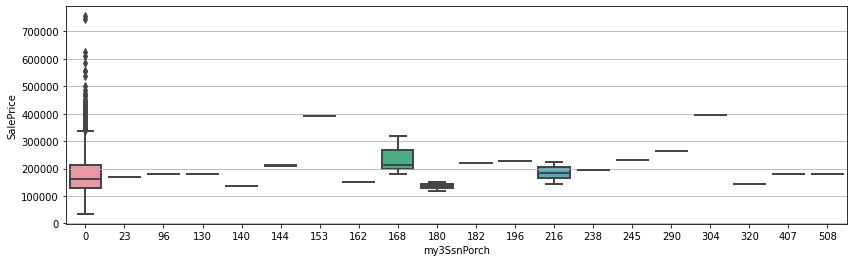

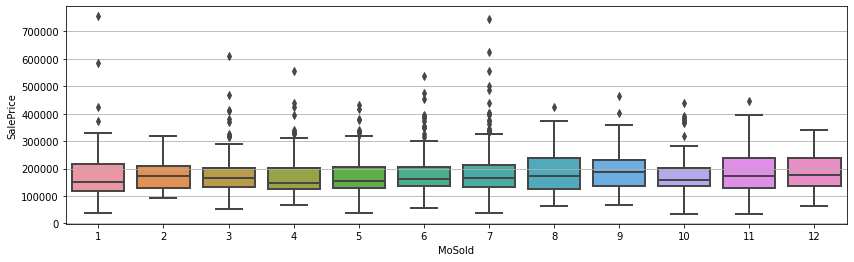

In [43]:
## 도움이 되지 않는 그래프는 제거
#구분이 되지 않는 것, 값이 나타나지 않는 것은 boxplot에서 제거
rem_vars = ['PoolArea', 'LowQualFinSF', 'MiscVal', '3SsnPorch']
discrete_vars=[fea for fea in numeric_features if len(train[fea].unique()) < 50 and fea not in year_fea + rem_vars + ['Id']]
print("Discrete Variables Count: {}".format(len(discrete_vars)))

for fea in discrete_vars:
  data = train.copy()
  sns.boxplot(x = fea, y='SalePrice', data = data)
  plt.show()

### 2. 연속형 그래프

##(1)가상의 데이터 생성

In [44]:
# discrete dataframe
LotArea = train['LotArea'].iloc[0:10]
temp = pd.DataFrame({'id' : [1,2,3,4,5,6,7,8,9,10],
                    'LotArea' : LotArea,
                    'SalePrice' : [1000,1300,2000,1030,2030,2050,2000,5000,3000,3500]
                    })
print(temp)

   id  LotArea  SalePrice
0   1     8450       1000
1   2     9600       1300
2   3    11250       2000
3   4     9550       1030
4   5    14260       2030
5   6    14115       2050
6   7    10084       2000
7   8    10382       5000
8   9     6120       3000
9  10     7420       3500


## (2) 산점도 그래프
- SalePrice와 LotArea 모두 연속형 변수 

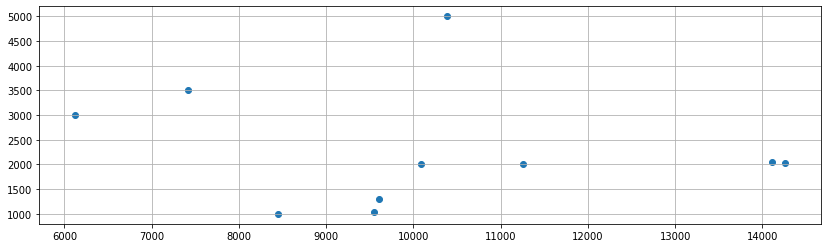

In [45]:
#matplotlib 방식
plt.scatter(x=temp['LotArea'], y = temp['SalePrice'])
plt.show()

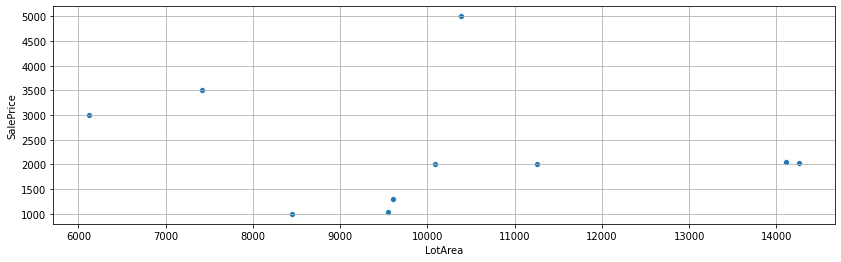

In [46]:
# seaborn 방식
sns.scatterplot(x='LotArea', y='SalePrice', data = temp)
plt.show()

## (3) 실무데이터 적용

In [47]:
#연속형 변수 도출
continuous_vars = [fea for fea in numeric_features if fea not in discrete_vars + year_fea + ['Id'] + ['SalePrice']]
print(continuous_vars)
print("The total number of continuous_vars are: ", len(continuous_vars))

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'my1stFlrSF', 'my2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
The total number of continuous_vars are:  18


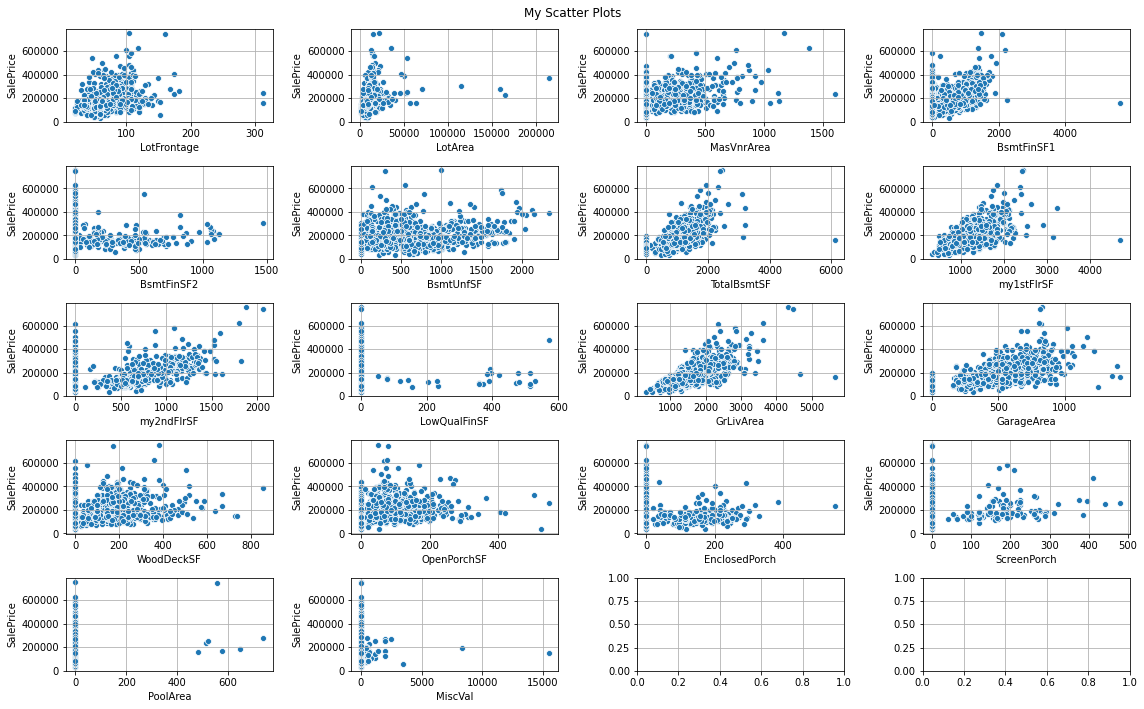

In [48]:
#산점도 생성
fig, ax = plt.subplots(5, 4, figsize=(16, 10)) # 그래프의 행과 열 지정 및, 이미지 사이즈 지정
data = train.copy()

for i, col in enumerate(data[continuous_vars].columns[0:]): # 좌표 평면 지정
     if i <= 3:
        sns.scatterplot(x=data[col], y=data["SalePrice"], ax=ax[0,i]) # 1행 좌표 평면
     elif i <= 7:
        sns.scatterplot(x=data[col], y=data["SalePrice"], ax=ax[1,i-4]) # 2행 좌표 평면
     elif i <= 11:
        sns.scatterplot(x=data[col], y=data["SalePrice"], ax=ax[2,i-8]) # 3행 좌표 평면
     elif i <= 15:
        sns.scatterplot(x=data[col], y=data["SalePrice"], ax=ax[3,i-12]) # 4행 좌표 평면
     else: 
        sns.scatterplot(x=data[col], y=data["SalePrice"], ax=ax[4,i-16]) # 5행 좌표 평면

fig.suptitle('My Scatter Plots')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

### 범주형 변수 탐색

## (1) Unique() 함수를 활용한 유일값 확인

In [ ]:
#unique() 함수를 적용해서 train 데이터의 각 변수의 유일값갯수 확인

In [49]:
for fea in categorical_features:
  data = train.copy()
  unique_category = len(data[fea].unique())
  print("변수 '{fea}'는 유일값 '{unique_category}'개를 가지고 있다.".format(fea = fea, unique_category=unique_category))

변수 'MSZoning'는 유일값 '5'개를 가지고 있다.
변수 'Street'는 유일값 '2'개를 가지고 있다.
변수 'Alley'는 유일값 '3'개를 가지고 있다.
변수 'LotShape'는 유일값 '4'개를 가지고 있다.
변수 'LandContour'는 유일값 '4'개를 가지고 있다.
변수 'Utilities'는 유일값 '2'개를 가지고 있다.
변수 'LotConfig'는 유일값 '5'개를 가지고 있다.
변수 'LandSlope'는 유일값 '3'개를 가지고 있다.
변수 'Neighborhood'는 유일값 '25'개를 가지고 있다.
변수 'Condition1'는 유일값 '9'개를 가지고 있다.
변수 'Condition2'는 유일값 '8'개를 가지고 있다.
변수 'BldgType'는 유일값 '5'개를 가지고 있다.
변수 'HouseStyle'는 유일값 '8'개를 가지고 있다.
변수 'RoofStyle'는 유일값 '6'개를 가지고 있다.
변수 'RoofMatl'는 유일값 '8'개를 가지고 있다.
변수 'Exterior1st'는 유일값 '15'개를 가지고 있다.
변수 'Exterior2nd'는 유일값 '16'개를 가지고 있다.
변수 'MasVnrType'는 유일값 '5'개를 가지고 있다.
변수 'ExterQual'는 유일값 '4'개를 가지고 있다.
변수 'ExterCond'는 유일값 '5'개를 가지고 있다.
변수 'Foundation'는 유일값 '6'개를 가지고 있다.
변수 'BsmtQual'는 유일값 '5'개를 가지고 있다.
변수 'BsmtCond'는 유일값 '5'개를 가지고 있다.
변수 'BsmtExposure'는 유일값 '5'개를 가지고 있다.
변수 'BsmtFinType1'는 유일값 '7'개를 가지고 있다.
변수 'BsmtFinType2'는 유일값 '7'개를 가지고 있다.
변수 'Heating'는 유일값 '6'개를 가지고 있다.
변수 'HeatingQC'는 유일값 '5'개를 가지고 있다.
변수 'CentralAir'는 유일값 '2'개를 가지고 있다.
변수

## (2) 범주형 그래프 시각화

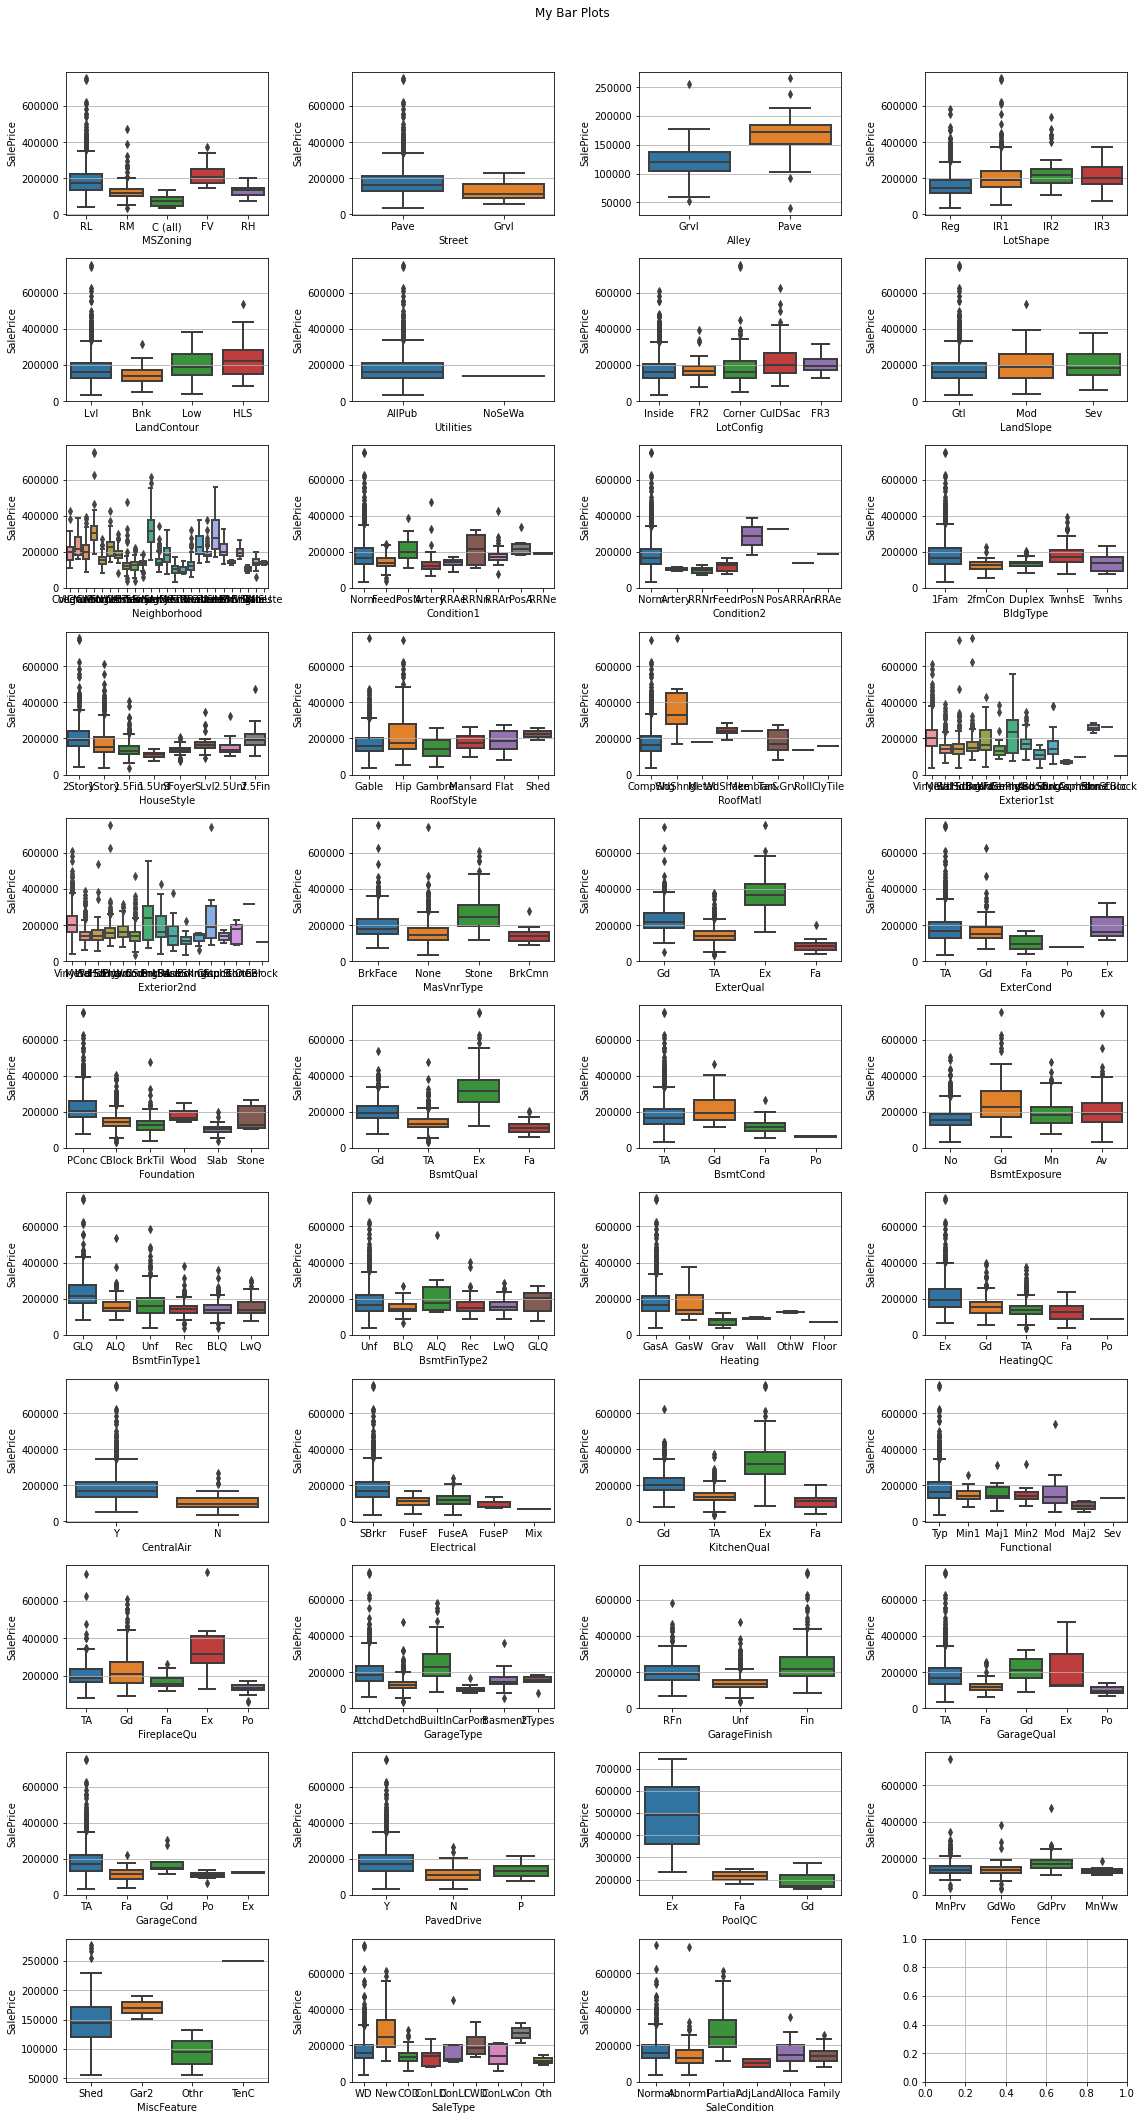

In [50]:
fig, ax = plt.subplots(11, 4, figsize=(16, 30)) # 그래프의 행과 열 지정 및, 이미지 사이즈 지정
data = pd.concat([categorical_features, train['SalePrice']], axis=1)
data.columns[0:]

for i, col in enumerate(data.columns[0:43]): # 좌표 평면 지정
     if i <= 3:
        sns.boxplot(x=data[col], y=data["SalePrice"], ax=ax[0,i]) # 1행 좌표 평면
     elif i <= 7:
        sns.boxplot(x=data[col], y=data["SalePrice"], ax=ax[1,i-4]) # 2행 좌표 평면
     elif i <= 11:
        sns.boxplot(x=data[col], y=data["SalePrice"], ax=ax[2,i-8]) # 3행 좌표 평면
     elif i <= 15:
        sns.boxplot(x=data[col], y=data["SalePrice"], ax=ax[3,i-12]) # 4행 좌표 평면
     elif i <= 19: 
        sns.boxplot(x=data[col], y=data["SalePrice"], ax=ax[4,i-16]) # 5행 좌표 평면
     elif i <= 23: 
        sns.boxplot(x=data[col], y=data["SalePrice"], ax=ax[5,i-20]) # 6행 좌표 평면
     elif i <= 27: 
        sns.boxplot(x=data[col], y=data["SalePrice"], ax=ax[6,i-24]) # 7행 좌표 평면
     elif i <= 31: 
        sns.boxplot(x=data[col], y=data["SalePrice"], ax=ax[7,i-28]) # 8행 좌표 평면
     elif i <= 35: 
        sns.boxplot(x=data[col], y=data["SalePrice"], ax=ax[8,i-32]) # 9행 좌표 평면
     elif i <= 39: 
        sns.boxplot(x=data[col], y=data["SalePrice"], ax=ax[9,i-36]) # 10행 좌표 평면
     else: 
        sns.boxplot(x=data[col], y=data["SalePrice"], ax=ax[10,i-40]) # 11행 좌표 평면

fig.suptitle('My Bar Plots')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

### 결측치 처리

## (1) 결측 데이터의 종류
- 임의적 결측 발생
- 완적무작위 결측 발생
- 비임의적 결측 발생

##(2) 결측 데이터 시각화

Text(0.5, 1.0, 'Percent missing data by feature')

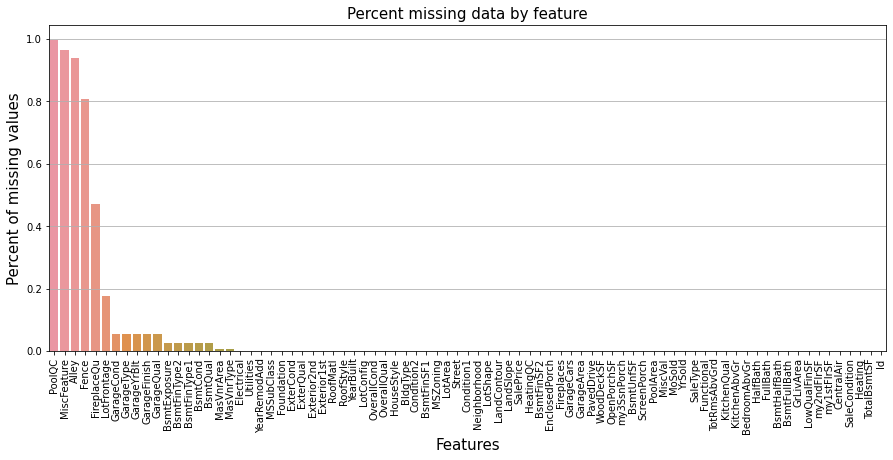

In [51]:
missing_total = train.isnull().sum().sort_values(ascending=False)
missing_rate = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing_total, missing_rate], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

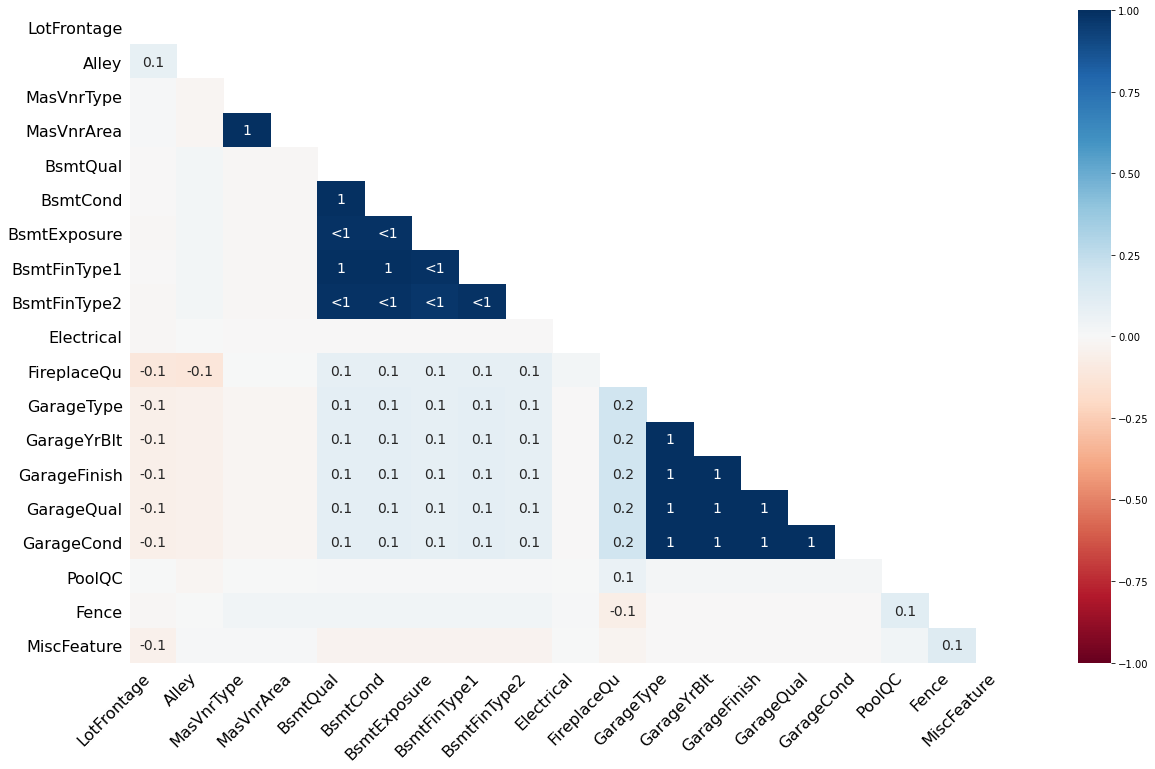

In [52]:
import missingno as msno
msno.heatmap(train)

### 이상치 확인 및 처리방법

## (1) 표준편차와 박스 플롯의 활용

In [53]:
train['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [54]:
#이상치 관련 함수 만들기
def out_std(series, nstd=3.0, return_thresholds=False):
    """
    판다스 시리즈에 표준편차 함수를 적용하여 이상치인지 아닌지 BOOL값으로 반환한다.  
    using standard deviation, works column-wise.
    param nstd:
        표준편차를 지정하는 값을 설정한다. nstd는 사용자가 직접 설계할 수 있다. 
    :type nstd: ``float`` 형식을 따른다. 
    param return_thresholds:
        True returns the lower and upper bounds, 그래프 작성 시 적용한다.
        False returns the masked array 
    :type return_thresholds: ``bool``
    """
    data_mean, data_std = series.mean(), series.std()
    cut_off = data_std * nstd
    lower, upper = data_mean - cut_off, data_mean + cut_off
    if return_thresholds:
        return lower, upper
    else:
        return [True if x < lower or x > upper else False for x in series]

def out_iqr(series, k=1.5, return_thresholds=False):
    """
    판다스 시리즈에 IQR(사분위) 함수를 적용하여 이상치인지 아닌지 BOOL값으로 반환한다.
    using interquartile range, works column-wise.
    param k:
        some cutoff to multiply by the iqr
    :type k: ``float``
    param return_thresholds:
        True returns the lower and upper bounds, 그래프 작성 시 적용한다.
        False returns the masked array 
    :type return_thresholds: ``bool``
    """
    # calculate interquartile range
    q25, q75 = np.percentile(series, 25), np.percentile(series, 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * k
    lower, upper = q25 - cut_off, q75 + cut_off
    if return_thresholds:
        return lower, upper
    else: # identify outliers
        return [True if x < lower or x > upper else False for x in series]

In [55]:
#out_std를 활용한 함수를 적용하여 이상치를 판별
lotArea_outlier = out_std(train['LotArea'], nstd = 1)
print(lotArea_outlier[:10])

[False, False, False, False, False, False, False, False, False, False]


In [56]:
#low와 high값 구하기
data = train.copy()
data['LotArea'][lotArea_outlier]

53       50271
113      21000
120      21453
171      31770
185      22950
197      25419
249     159000
271      39104
313     215245
335     164660
384      53107
411      34650
417      22420
422      21750
451      70761
457      53227
523      40094
529      32668
558      21872
563      21780
588      25095
661      46589
664      20896
691      21535
692      26178
706     115149
726      21695
769      53504
807      21384
828      28698
848      45600
876      25286
934      27650
939      24090
943      25000
1010     21286
1048     21750
1057     29959
1107     23257
1169     35760
1184     35133
1190     32463
1260     24682
1270     23595
1287     36500
1298     63887
1346     20781
1383     25339
1396     57200
1409     20544
1430     21930
1446     26142
Name: LotArea, dtype: int64

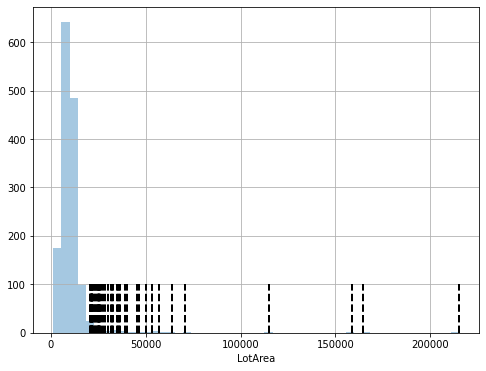

In [57]:
##위의 결과를 대상으로한 시각화 진행(히스토그램)
plt.figure(figsize=(8,6))
sns.distplot(data['LotArea'], kde=False);
plt.vlines(data['LotArea'][lotArea_outlier], ymin=0, ymax=100, linestyles='dashed');

In [58]:
#위 검은색 선이 모두 이상치
#이번에는 IQR를 활용해서 그래프까지 작성
lotArea_outlier_iqr = out_iqr(train['LotArea'])
data = train.copy()
data['LotArea'][lotArea_outlier_iqr]

53      50271
66      19900
113     21000
120     21453
159     19378
        ...  
1396    57200
1409    20544
1423    19690
1430    21930
1446    26142
Name: LotArea, Length: 69, dtype: int64

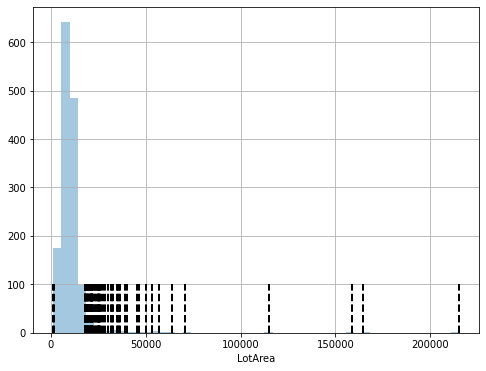

In [59]:
plt.figure(figsize=(8,6))
sns.distplot(data['LotArea'], kde=False);
plt.vlines(data['LotArea'][lotArea_outlier_iqr], ymin=0, ymax=100, linestyles='dashed');

##(2) 이상치 제거

In [60]:
data = train.copy()
len(data)

1460

제거하는 방법은 lotArea_outlier값이 BOOL이기 때문에, TRUE에 해당하는 값만 확인해서 제거하면 된다.

In [61]:
data['outlier_LotArea'] = lotArea_outlier_iqr
data2 = data[data['outlier_LotArea'] == False]
len(data2)

1391